In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import tree
from dtreeviz.trees import dtreeviz
import graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('E:\ExcelR Assignment\Assignment 14 - Decision Tree\Fraud_Check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Univariate Analysis

#### 1. Continuous Variables

<AxesSubplot:xlabel='Work.Experience', ylabel='Count'>

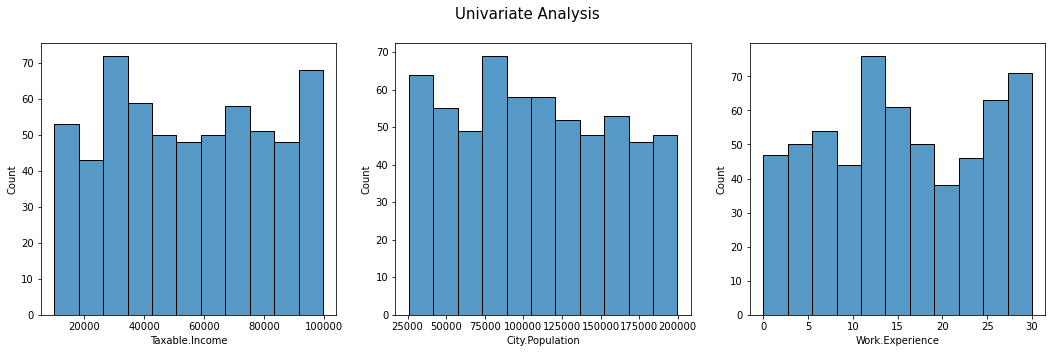

In [5]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
fig.suptitle('Univariate Analysis',fontsize=15)
sns.histplot(df['Taxable.Income'],ax=axes[0])
sns.histplot(df['City.Population'],ax=axes[1])
sns.histplot(df['Work.Experience'],ax=axes[2])

#### 2. Categorical Variables

<AxesSubplot:xlabel='Urban', ylabel='count'>

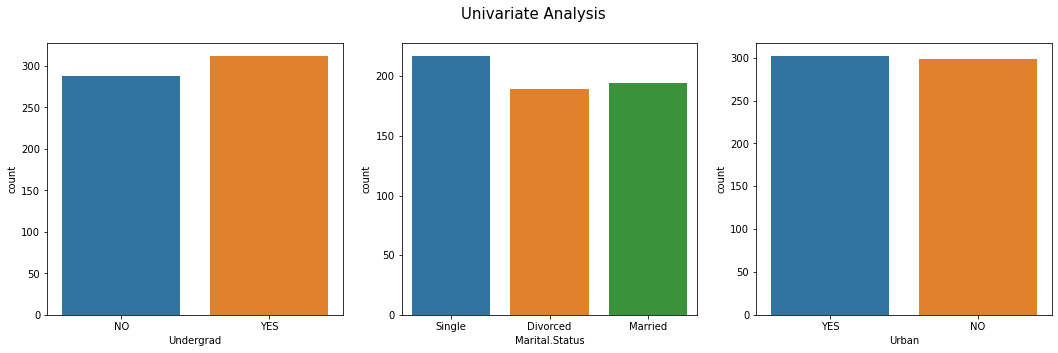

In [6]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
fig.suptitle('Univariate Analysis',fontsize=15)
sns.countplot(data=df,x=df['Undergrad'],ax=axes[0])
sns.countplot(data=df,x=df['Marital.Status'],ax=axes[1])
sns.countplot(data=df,x=df['Urban'],ax=axes[2])

#### Inferences:
1. Proportion of Undergraduates does not vary much with those who haven't done undergraduation
2. Most of the people are single whereas porportion of Divorced and Married have almost equal count
3. Ditributed proportion of people living in Urban and not Urban

### Bivariate Analysis

<AxesSubplot:xlabel='Urban', ylabel='Taxable.Income'>

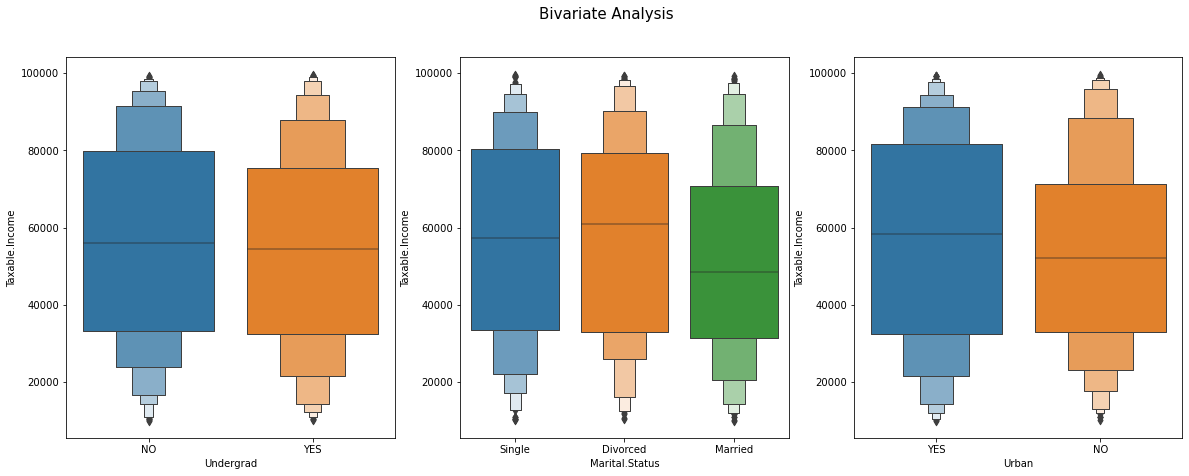

In [7]:
fig, axes = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Bivariate Analysis',fontsize=15)
sns.boxenplot(data=df,x='Undergrad',y='Taxable.Income',ax=axes[0])
sns.boxenplot(data=df,x='Marital.Status',y='Taxable.Income',ax=axes[1])
sns.boxenplot(data=df,x='Urban',y='Taxable.Income',ax=axes[2])

#### Inferences:
1. Proportion of Taxable Income for Undergraduates does not vary much with those who haven't done undergraduation
2. People with Marital Status have less Taxable Income whereas porportion of Divorced and Single have almost equal Taxable Income
3. Urban people account to more Tax compared to Non-Urban Class which is obvious

### Binning with Taxslab of less than 30000 as Risky and others as Good

In [24]:
df.loc[df['Taxable.Income']<=30000,'TaxSlab'] ='Risky'
df.loc[df['Taxable.Income']>30000,'TaxSlab'] ='Good'

In [25]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxSlab
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


In [26]:
df1 = df.copy()

In [27]:
df1 = df1.drop(['Taxable.Income'],axis=1)

In [28]:
df1.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxSlab
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good


### LABEL ENCODING

In [29]:
label_encoder = preprocessing.LabelEncoder()
df1['LabelUndergrad']= label_encoder.fit_transform(df1['Undergrad'])
df1['LabelMaritalStatus']= label_encoder.fit_transform(df1['Marital.Status'])
df1['LabelUrban']= label_encoder.fit_transform(df1['Urban'])
df1['LabelTaxSlab']= label_encoder.fit_transform(df1['TaxSlab'])
df1.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxSlab,LabelUndergrad,LabelMaritalStatus,LabelUrban,LabelTaxSlab
0,NO,Single,50047,10,YES,Good,0,2,1,0
1,YES,Divorced,134075,18,YES,Good,1,0,1,0


In [30]:
df1 = df1.drop(['Undergrad','Marital.Status','Urban','TaxSlab'],axis=1)
df1.head(2)

,City.Population,Work.Experience,LabelUndergrad,LabelMaritalStatus,LabelUrban,LabelTaxSlab
0,50047,10,0,2,1,0
1,134075,18,1,0,1,0


In [32]:
X = df1.iloc[:,0:-1]
y = df1.iloc[:,-1]

In [33]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=10,stratify=y)

In [34]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(0    0.792857
 1    0.207143
 Name: LabelTaxSlab, dtype: float64,
 0    0.794444
 1    0.205556
 Name: LabelTaxSlab, dtype: float64)

### Building model with Gini Criterion

In [55]:
dtmodel = DecisionTreeClassifier(random_state=10,max_depth=5,criterion='gini')
dtmodel.fit(X_train,y_train)
dtmodel.score(X_train,y_train)

0.8214285714285714

In [56]:
dtmodel.score(X_test,y_test)

0.7555555555555555

In [57]:
train_Accuracy = []
test_Accuracy = []

for depth in range(1,10):
    dtmodel = DecisionTreeClassifier(max_depth = depth,random_state=10,criterion='gini')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [58]:
frame = pd.DataFrame({'max_depth':range(1,10),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_depth,Train_Acc,Test_Acc
0,1,0.792857,0.794444
1,2,0.800000,0.761111
2,3,0.802381,0.772222
3,4,0.807143,0.766667
4,5,0.821429,0.755556
5,6,0.828571,0.766667
6,7,0.857143,0.711111
7,8,0.876190,0.688889
8,9,0.904762,0.655556


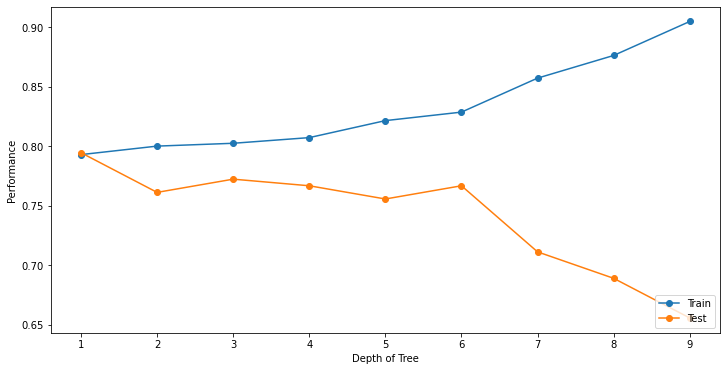

In [59]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_depth'],frame['Test_Acc'],marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### From here we can identify that max_depth = 3 is best it gives around 76% Accuracy for Test set and 80% for Train Set.

-   We have to further tune more Parameters like max_leaf_nodes

### Tuning max_leaf_nodes value

In [60]:
train_Accuracy = []
test_Accuracy = []

for nodes in range(2,15):
    dtmodel = DecisionTreeClassifier(max_depth = 3,max_leaf_nodes=nodes,random_state=10,criterion='gini')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [61]:
frame = pd.DataFrame({'max_leaf_nodes':range(2,15),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_leaf_nodes,Train_Acc,Test_Acc
0,2,0.792857,0.794444
1,3,0.800000,0.761111
2,4,0.800000,0.761111
3,5,0.800000,0.761111
4,6,0.800000,0.761111
5,7,0.802381,0.755556
6,8,0.802381,0.772222
7,9,0.802381,0.772222
8,10,0.802381,0.772222
9,11,0.802381,0.772222


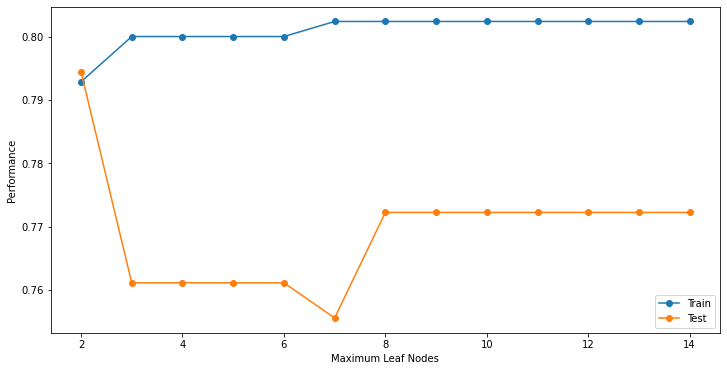

In [62]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_leaf_nodes'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_leaf_nodes'],frame['Test_Acc'],marker='o')
plt.xlabel('Maximum Leaf Nodes')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So Maximum Leaf Nodes should be 8 from analysis.
### We will now try building model with our depth and node values

In [67]:
dtmodel = DecisionTreeClassifier(max_depth = 3 , max_leaf_nodes = 8, random_state=10,criterion='gini')
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=10)

In [68]:
dtmodel.score(X_train,y_train),dtmodel.score(X_test,y_test)

(0.8023809523809524, 0.7722222222222223)

In [69]:
pred = dtmodel.predict(X_test)

In [70]:
pd.Series(pred).value_counts()

0    176
1      4
dtype: int64

In [71]:
pd.crosstab(y_test,pred)

col_0,0,1
LabelTaxSlab,,
0,139,4
1,37,0


### Building Model with Entropy

In [86]:
dtmodel1 = DecisionTreeClassifier(random_state=10,max_depth=5,criterion='entropy')
dtmodel1.fit(X_train,y_train)
dtmodel1.score(X_train,y_train)

0.8023809523809524

In [87]:
dtmodel1.score(X_test,y_test)

0.7833333333333333

### Tuning max_depth value

In [88]:
train_Accuracy = []
test_Accuracy = []

for depth in range(1,10):
    dtmodel1 = DecisionTreeClassifier(max_depth = depth,random_state=10,criterion='entropy')
    dtmodel1.fit(X_train,y_train)
    train_Accuracy.append(dtmodel1.score(X_train,y_train))
    test_Accuracy.append(dtmodel1.score(X_test,y_test))

In [89]:
frame = pd.DataFrame({'max_depth':range(1,10),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_depth,Train_Acc,Test_Acc
0,1,0.792857,0.794444
1,2,0.792857,0.794444
2,3,0.792857,0.794444
3,4,0.792857,0.794444
4,5,0.802381,0.783333
5,6,0.823810,0.727778
6,7,0.840476,0.744444
7,8,0.866667,0.744444
8,9,0.883333,0.738889


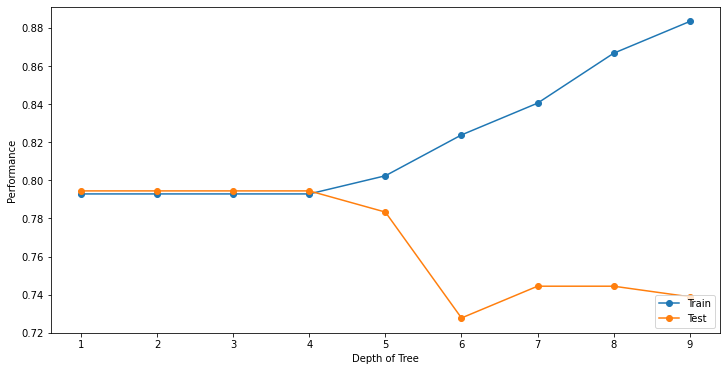

In [90]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_depth'],frame['Test_Acc'],marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### From here we can identify that max_depth = 4 is best it gives around 79% Accuracy for Test set and 79% for Train Set.

-   We have to further tune more Parameters like max_leaf_nodes

### Tuning max_leaf_nodes value

In [91]:
train_Accuracy = []
test_Accuracy = []

for nodes in range(2,15):
    dtmodel1 = DecisionTreeClassifier(max_depth = 6,max_leaf_nodes=nodes,random_state=10,criterion='entropy')
    dtmodel1.fit(X_train,y_train)
    train_Accuracy.append(dtmodel1.score(X_train,y_train))
    test_Accuracy.append(dtmodel1.score(X_test,y_test))

In [92]:
frame = pd.DataFrame({'max_leaf_nodes':range(2,15),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_leaf_nodes,Train_Acc,Test_Acc
0,2,0.792857,0.794444
1,3,0.792857,0.794444
2,4,0.792857,0.794444
3,5,0.792857,0.794444
4,6,0.792857,0.794444
5,7,0.792857,0.794444
6,8,0.792857,0.794444
7,9,0.792857,0.794444
8,10,0.792857,0.794444
9,11,0.792857,0.794444


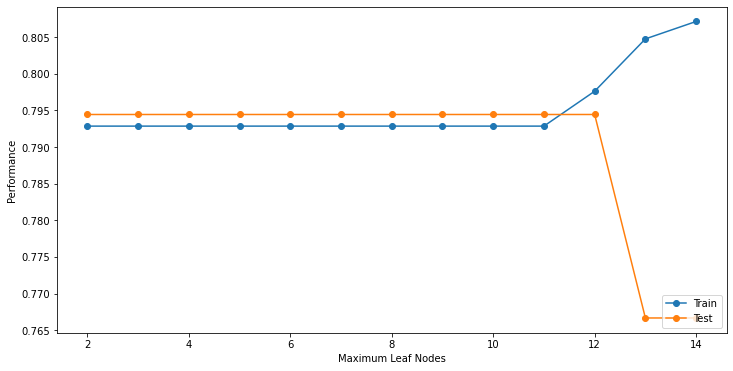

In [93]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_leaf_nodes'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_leaf_nodes'],frame['Test_Acc'],marker='o')
plt.xlabel('Maximum Leaf Nodes')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So Maximum Leaf Nodes should be 10 from analysis.
### We will now try building model with our depth and node values

In [94]:
dtmodel1 = DecisionTreeClassifier(random_state=10,max_depth=4,max_leaf_nodes=10,criterion='entropy')
dtmodel1.fit(X_train,y_train)
dtmodel1.score(X_train,y_train)

0.7928571428571428

In [95]:
dtmodel1.score(X_test,y_test)

0.7944444444444444

In [96]:
pred = dtmodel1.predict(X_test)

In [97]:
pd.Series(pred).value_counts()

0    180
dtype: int64

In [98]:
pd.crosstab(y_test,pred)

col_0,0
LabelTaxSlab,
0,143
1,37


### Building Best Model with GridSearch CV

In [63]:
dtmodel = DecisionTreeClassifier(random_state=10)
a=[3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]

In [64]:
gridparam = GridSearchCV(dtmodel,parameter)
gridparam.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [72]:
gridparam.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [73]:
gridparam.best_score_

0.7928571428571429

### Building Model with Best Parameters achieved from Grid Search

In [80]:
fdtmodel = DecisionTreeClassifier(random_state=10,max_depth=3,max_leaf_nodes=3,min_samples_leaf=3,min_samples_split=3,criterion='entropy')

In [81]:
fdtmodel.fit(X_train,y_train)
fdtmodel.score(X_train,y_train)

0.7928571428571428

In [82]:
fdtmodel.score(X_test,y_test)

0.7944444444444444

In [83]:
pred = dtmodel.predict(X_test)

In [84]:
pd.Series(pred).value_counts()

0    176
1      4
dtype: int64

In [85]:
pd.crosstab(y_test,pred)

col_0,0,1
LabelTaxSlab,,
0,139,4
1,37,0


## Conclusion:

1. Gini Method
- Train Accuracy: 80
- Test Accuracy: 77

2. Entropy Method
- Train Accuracy: 79
- Test Accuracy: 79

3. Gridsearch
- Train Accuracy: 79
- Test Accuracy: 79